In [1]:
#선형 SVM

import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] #꽃잎 길이, 꽃잎 너비
y = (iris["target"] == 2).astype(np.float64) #iris-virginica

svm_clf = Pipeline([
    ("scaler", StandardScaler()), #훈련 세트에서 평균을 빼서 중앙에 맞추기
    ("linear_svc", LinearSVC(C=1, loss="hinge")) #C가 클수록 마진 오류가 적다.
])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [2]:
svm_clf.predict([[5.5, 1.7]]) #predict_proba를 사용하려면, SVC에 probability=True 옵션 필요

array([1.])

# 비선형 SVM 분류

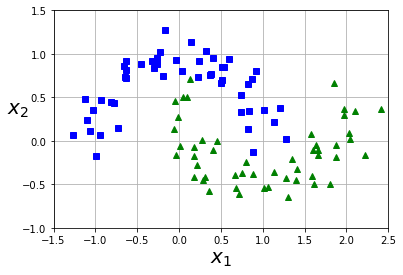

In [18]:
%matplotlib inline

import matplotlib.pyplot as plt

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")#예측 결과값이 0인 것들의 x, y좌표
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")#예측 결과값이 1인 것들의 x, y좌표
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel("$x_1$", fontsize=20)
    plt.ylabel("$x_2$", fontsize=20, rotation=0)
    
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [19]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
])

polynomial_svm_clf.fit(X, y)

c:\sources\python\deeplearning\dl\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

In [11]:
import os

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

(10000, 2)
그림 저장: moons_polynomial_svc_plot


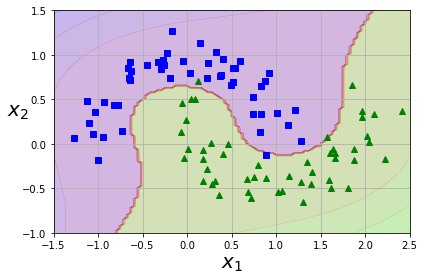

In [21]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s) #x0은 1행 -> 100행 복사, x1은 1열 -> 100열 복사
    X = np.c_[x0.ravel(), x1.ravel()] #x0, x1을 입력값으로 하는 (10000, 2) 행렬 생성
    print(X.shape)
    
    y_pred = clf.predict(X).reshape(x0.shape) #100X100 으로 변환
    y_decision = clf.decision_function(X).reshape(x0.shape)
    
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

save_fig("moons_polynomial_svc_plot")
plt.show()

SVM 다항식 커널

커널 트릭 : 실제로는 특성을 추가하지 않으면서 다항식 특성을 많이 추가한 것 같은 결과를 얻을 수 있음

In [23]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5, random_state=42))
])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly', random_state=42))])

In [31]:
poly_kernel_svm_clf2 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5, random_state=42))
])
poly_kernel_svm_clf2.fit(X, y)    

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf',
                 SVC(C=5, coef0=100, degree=10, kernel='poly',
                     random_state=42))])

(10000, 2)
(10000, 2)
그림 저장: moons_polynomial_svc_kernel_plot


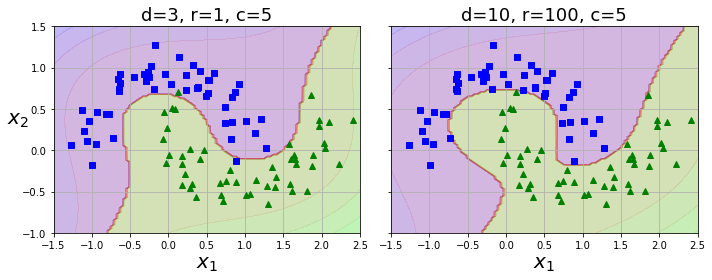

In [40]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title("d=3, r=1, c=5", fontsize=18)

plt.sca(axes[1])
plot_predictions(poly_kernel_svm_clf2, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title("d=10, r=100, c=5", fontsize=18)
plt.ylabel("")

save_fig("moons_polynomial_svc_kernel_plot")
plt.show()

오른쪽 그래프는 10차 다항식 커널을 이용할 것

과대적합이라면 다항식의 차수를 줄여야, 반대로 과소적합이라면 다항식의 차수를 늘려야

유사도 특성

비선형 특성의 경우 각 샘플이 특정 랜드마크와 얼마나 닮았는지 측정하는 유사도 함수로 계산한 특성을 추가할 수 있음

유사도 함수 : 가우시안 방사 기저 함수(RBF)

In [41]:
#가우시안 RBF 커널

rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])

rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

In [42]:
rbf_kernel_svm_clf_5_1000 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=1000))
])

rbf_kernel_svm_clf_5_1000.fit(X, y)

rbf_kernel_svm_clf_1_1e3 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=0.1, C=0.001))
])

rbf_kernel_svm_clf_1_1e3.fit(X, y)

rbf_kernel_svm_clf_1_1000 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=0.1, C=1000))
])

rbf_kernel_svm_clf_1_1000.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=1000, gamma=0.1))])

(10000, 2)
(10000, 2)
(10000, 2)
(10000, 2)
그림 저장: moons_polynomial_svc_rbf_plot


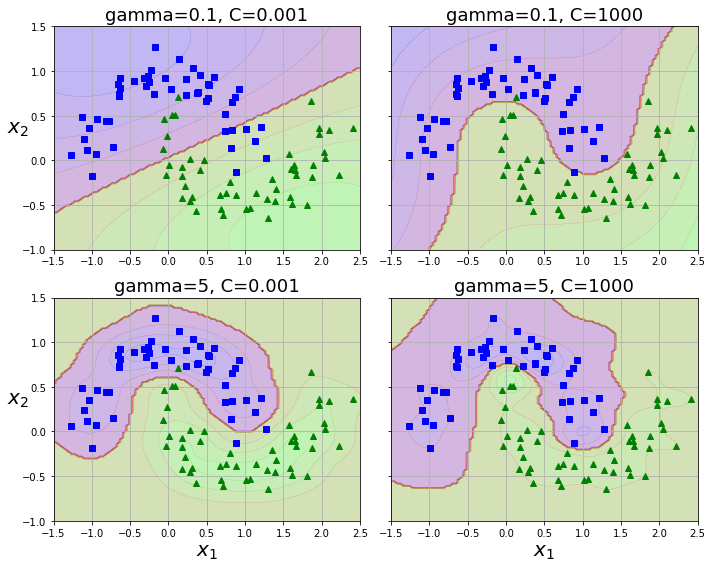

In [46]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 8), sharey=True)

plt.sca(axes[0][0])
plot_predictions(rbf_kernel_svm_clf_1_1e3, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title("gamma=0.1, C=0.001", fontsize=18)
plt.xlabel("")

plt.sca(axes[0][1])
plot_predictions(rbf_kernel_svm_clf_1_1000, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title("gamma=0.1, C=1000", fontsize=18)
plt.ylabel("")
plt.xlabel("")

plt.sca(axes[1][0])
plot_predictions(rbf_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title("gamma=5, C=0.001", fontsize=18)


plt.sca(axes[1][1])
plot_predictions(rbf_kernel_svm_clf_5_1000, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title("gamma=5, C=1000", fontsize=18)
plt.ylabel("")

save_fig("moons_polynomial_svc_rbf_plot")
plt.show()

(10000, 2)
(10000, 2)
(10000, 2)
(10000, 2)
그림 저장: moons_polynomial_svc_rbf_plot


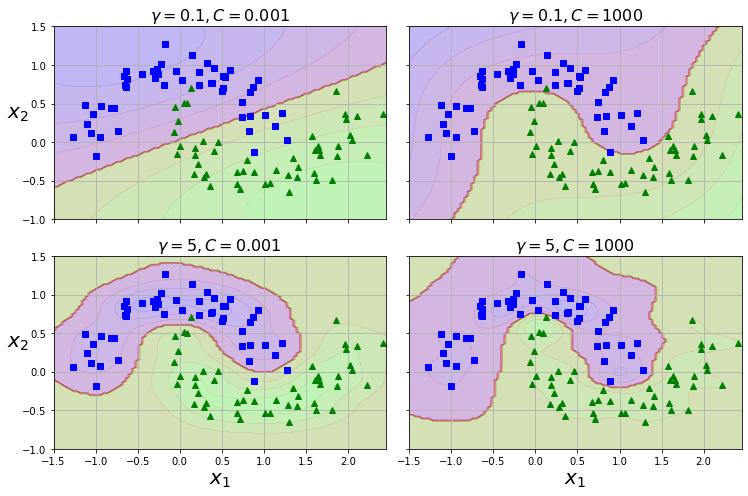

In [48]:
#좀 더 깔끔한 코드
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_cvm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
    ])
    rbf_kernel_cvm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_cvm_clf)
    
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(f"$\gamma = {gamma}, C = {C}$", fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")
        
save_fig("moons_polynomial_svc_rbf_plot")
plt.show()

감마를 증가시키면 종모양 그래프가 좁아져서 샘플의 영향 범위가 작아지며, 결정 경계가 좀 더 불규칙적이며 구불구불 휘어진다

감마를 감소시키면 샘플이 넓은 범위에 걸쳐 영향을 주므로 결정 경계가 부드러워 진다.

과대적합일 경우 감소, 과소적합일 경우 증가(C와 유사하며 함께 조정하는 것이 일반적)

항상 선형 커널은 먼저 시도해야 함. LinearSVC가 SVC(kernel="linear")보다 훨씬 빠르다

훈련 세트가 너무 크지 않다면 가우시안 RBF. 대부분 이 커널이 잘 맞는다.

LinearSVC의 알고리즘 복잡도 O(m x n) : 샘플 수와 특성 수에 따라 선형적 증가
    
SVC는 O(m2 x n) 과 O(m3 x n)사이 : 샘플수가 커지면 많이 느려짐.

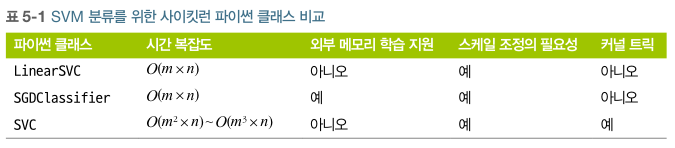

# SVM회귀

SVM회귀는 분류와 반대로 마진 안 쪽으로 가능한 많은 샘플이 들어가로도록 학습함

허용오차는 tol매개변수, 도로의 폭은 epsilon 매개변수

In [49]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

X, y

(array([[0.74908024],
        [1.90142861],
        [1.46398788],
        [1.19731697],
        [0.31203728],
        [0.31198904],
        [0.11616722],
        [1.73235229],
        [1.20223002],
        [1.41614516],
        [0.04116899],
        [1.9398197 ],
        [1.66488528],
        [0.42467822],
        [0.36364993],
        [0.36680902],
        [0.60848449],
        [1.04951286],
        [0.86389004],
        [0.58245828],
        [1.22370579],
        [0.27898772],
        [0.5842893 ],
        [0.73272369],
        [0.91213997],
        [1.57035192],
        [0.39934756],
        [1.02846888],
        [1.18482914],
        [0.09290083],
        [1.2150897 ],
        [0.34104825],
        [0.13010319],
        [1.89777107],
        [1.93126407],
        [1.6167947 ],
        [0.60922754],
        [0.19534423],
        [1.36846605],
        [0.88030499],
        [0.24407647],
        [0.99035382],
        [0.06877704],
        [1.8186408 ],
        [0.51755996],
        [1

In [50]:
from sklearn.svm import LinearSVR

svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y-y_pred) >= svm_reg.epsilon) #도로의 경계선을 벗어난 것들
    return np.argwhere(off_margin) #특정 조건을 만족하는 데이터의 인덱스 찾기

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

그림 저장: svm_regression_plot


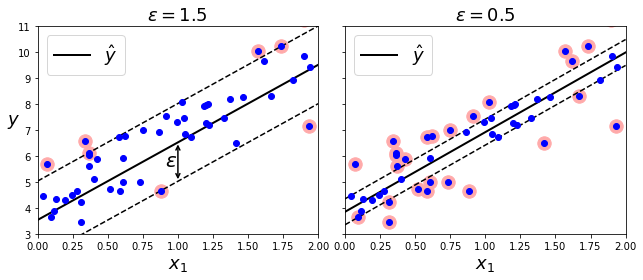

In [58]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label="$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors="#FFAAAA") #분홍색 점들(경계를 벗어난 것들)
    plt.plot(X, y, "bo")
    plt.xlabel("$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)
    
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(f"$\epsilon = {svm_reg1.epsilon}$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.annotate(
    "", xy=(eps_x1, eps_y_pred), xycoords='data',
    xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
    textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
)
plt.text(0.91, 5.6, "$\epsilon$", fontsize=20)

plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(f"$\epsilon = {svm_reg2.epsilon}$", fontsize=18)

save_fig("svm_regression_plot")
plt.show()

In [59]:
#비선형 회귀 예측

np.random.seed(42)
m = 100
X = 2 * np.random.rand(m , 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel() #2차 방정식

In [60]:
#선형은 LinearSVR, 비선형은 커널 SVM 모델인 SVR

from sklearn.svm import SVR

svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="scale")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, degree=2, kernel='poly')

그림 저장: svm_with_polynomial_kernel_plot


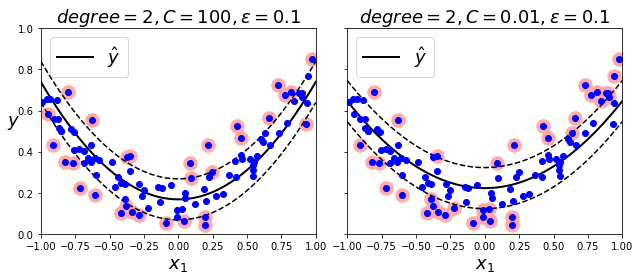

In [64]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(f"$degree={svm_poly_reg1.degree}, C={svm_poly_reg1.C}, \epsilon={svm_poly_reg1.epsilon}$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)

plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(f"$degree={svm_poly_reg2.degree}, C={svm_poly_reg2.C}, \epsilon={svm_poly_reg2.epsilon}$", fontsize=18)

save_fig("svm_with_polynomial_kernel_plot")
plt.show()

왼쪽 그래프는 규제가 거의 없고(큰 C), 오른쪽 그래프는 규제가 많다(작은 C)

LinearSVR은 LinearSVC와 동일하게 훈련 세트의 크기에 비례해서 선형적으로 훈련 시간 증가

SVR은 SVC처럼 훈련 세트가 커지면 많이 느려짐

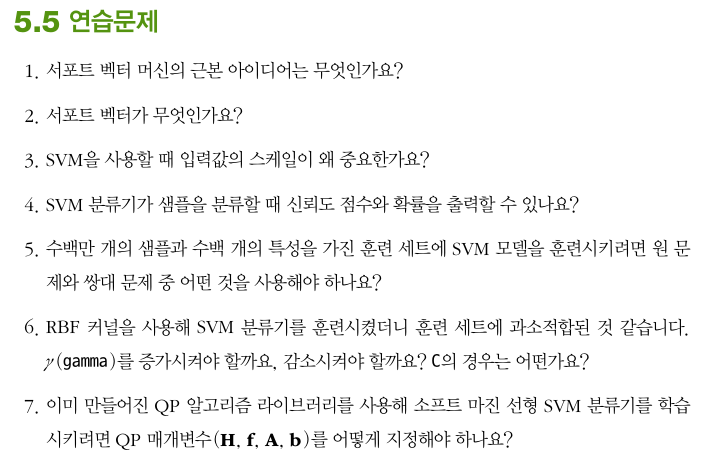

1. 분류할 클래스 사이에 가능한 한 가장 넓은 '도로'를 내는 것  
   두 클래스를 구분하는 결정 경계와 샘플 사이의 마진을 가장 크게 하는 것이 목적  
   소프트 마진 분류는 두 클래스를 완벽하게 분류하는 것과 가장 넓은 도로를 만드는 것 사이에서 절충함
   
   
2. SVM이 훈련된 후에 경계를 포함해서 도로에 놓인 어떤 샘플. 결정 경계는 서포트 벡터에 의해 결정  
   서포트 벡터가 아닌 어떤 샘플로 결정 경계에 영향X  
   예측 계산할 때는 전체 훈련 세트가 아니라 서포트 벡터만 관여
   
   
3. 훈련 세트의 스케일이 맞지 않으면 크기가 작은 특성을 무시하는 경향 있음


4. SVM모델을 만들 때 probability=True옵션을 주면 SVM의 점수에 로직스틱 회귀를 훈련 시켜 확률 계산. predict_proba(), predict_log_proba() 추가


5. 커널SVM은 쌍대 형식만 가능 하므로 선형 SVM에 대한 질문  
   수백만 개의 샘플 이라면 원 문제를 사용해야


6. 과소적합이라면 규제를 줄여야. 규제를 줄이려면 gamma, C를 모두 증가시켜야


7. -_-?? 뭔 소리여

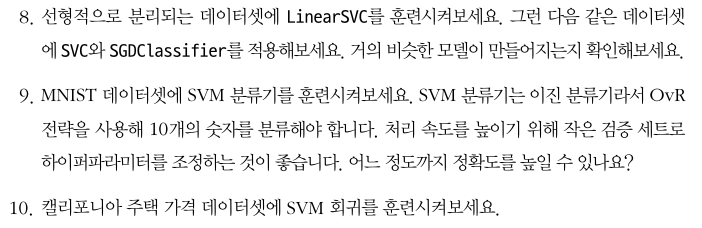

In [65]:
#8번

from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] #꽃잎 길이, 너비
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [69]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

C = 5
alpha = 1 / (C * len(X))

lin_clf = LinearSVC(loss="hinge", C=C, random_state=42)
svm_clf = SVC(kernel="linear", C=C)
sgd_clf = SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001, alpha=alpha,
                       max_iter=1000, tol=1e-3, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf.fit(X_scaled, y)
svm_clf.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)

#편향, 가중치
print(f"LinearSVC:                 ", lin_clf.intercept_, lin_clf.coef_)
print(f"SVC:                       ", svm_clf.intercept_, svm_clf.coef_)
print("SGDClassifier(alpha={:.5f}):".format(sgd_clf.alpha), sgd_clf.intercept_, sgd_clf.coef_)

LinearSVC:                  [0.28475098] [[1.05364854 1.09903804]]
SVC:                        [0.31896852] [[1.1203284  1.02625193]]
SGDClassifier(alpha=0.00200): [0.117] [[0.77714169 0.72981762]]


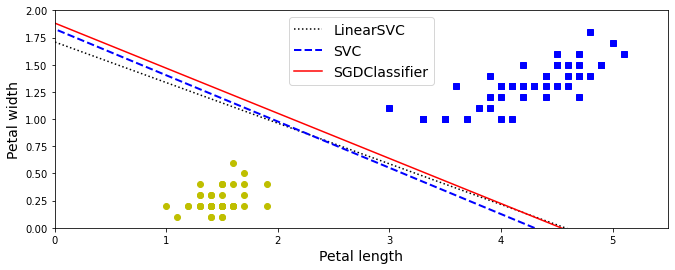

In [70]:
#모델의 경계 그리기

#각 결정 경계의 기울기와 편향 계산
w1 = -lin_clf.coef_[0, 0] / lin_clf.coef_[0, 1]
b1 = -lin_clf.intercept_[0] / lin_clf.coef_[0, 1]
w2 = -svm_clf.coef_[0, 0] / svm_clf.coef_[0, 1]
b2 = -svm_clf.intercept_[0] / svm_clf.coef_[0, 1]
w3 = -sgd_clf.coef_[0, 0] / sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0] / sgd_clf.coef_[0, 1]

#결정 경계를 원본 스케일로 변환
line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

#세 개의 결정 경계 그리기
plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")

plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") #iris-versicolor
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") #iris-setosa

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

비슷하게 나온다

In [71]:
#연습문제 9

#데이터셋을 로드하고 훈련 세트와 테스트 세트로 나눈다.
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version=1, cache=True)

mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [73]:
mnist.data.shape

(70000, 784)

In [80]:
#이 데이터 셋은 이미 섞여 있으므로 랜덤하게 섞을 필요 없음.
X_train = mnist.data[:60000]
y_train = mnist.target[:60000]
X_test = mnist.data[60000:]
y_test = mnist.target[60000:]

In [75]:
#선형 SVM 분류기, 자동으로 OvA, OvO를 선택함

lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train, y_train)

c:\sources\python\deeplearning\dl\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(random_state=42)

In [78]:
# 훈련 세트에 대한 예측, 최종 모델이 아니기 때문에 테스트 세트는 사용하지 말 것

from sklearn.metrics import accuracy_score

y_pred = lin_clf.predict(X_train)
accuracy_score(y_train, y_pred)

0.8348666666666666

선형 모델이 mnist문제에는 너무 단순하므로 먼저 데이터의 스케일 조정

In [81]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [82]:
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train_scaled, y_train)

c:\sources\python\deeplearning\dl\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(random_state=42)

In [83]:
y_pred = lin_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9214

In [85]:
#성능을 더 높이기 위해 SVM과 RBF 커널 사용

#SVC는 샘플 수에 따라 시간이 제곱-세제곱으로 증가하므로 샘플 수 낮춤
svm_clf = SVC(gamma="scale")
svm_clf.fit(X_train_scaled[:10000], y_train[:10000])

SVC()

In [86]:
y_pred = svm_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9455333333333333

1/6의 훈련 데이터로 더 좋은 성능을 얻었다.

랜덤 서치로 하이퍼파라미터 튜닝

In [87]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_dists = {
    "gamma": reciprocal(0.001, 0.1),
    "C": uniform(1, 10)
}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_dists, n_iter=10, verbose=2, cv=3)
rnd_search_cv.fit(X_train_scaled[:1000], y_train[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=7.689240596630997, gamma=0.053497702356221796 .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. C=7.689240596630997, gamma=0.053497702356221796, total=   0.6s
[CV] C=7.689240596630997, gamma=0.053497702356221796 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] .. C=7.689240596630997, gamma=0.053497702356221796, total=   0.6s
[CV] C=7.689240596630997, gamma=0.053497702356221796 .................
[CV] .. C=7.689240596630997, gamma=0.053497702356221796, total=   0.6s
[CV] C=3.3018526824155527, gamma=0.009962922677707813 ................
[CV] . C=3.3018526824155527, gamma=0.009962922677707813, total=   0.6s
[CV] C=3.3018526824155527, gamma=0.009962922677707813 ................
[CV] . C=3.3018526824155527, gamma=0.009962922677707813, total=   0.6s
[CV] C=3.3018526824155527, gamma=0.009962922677707813 ................
[CV] . C=3.3018526824155527, gamma=0.009962922677707813, total=   0.6s
[CV] C=6.720041992091831, gamma=0.034443559676607075 .................
[CV] .. C=6.720041992091831, gamma=0.034443559676607075, total=   0.6s
[CV] C=6.720041992091831, gamma=0.034443559676607075 .................
[CV] .. C=6.720041992091831, gamma=0.034443559676607075, total=   0.6s
[CV] C=6.720041992091831, gamma=0.034443559676607075 .................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   17.3s finished


RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002687D64A6A0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002687703D880>},
                   verbose=2)

In [88]:
rnd_search_cv.best_estimator_

SVC(C=10.803315837160456, gamma=0.0014147917283055171)

In [89]:
rnd_search_cv.best_score_

0.8639927352502204

점수는 1000개의 샘플만 사용했으므로 낮음

전체 데이터셋으로 재훈련(몇 시간 걸릴지도)

In [93]:
rnd_search_cv.best_estimator_.fit(X_train_scaled, y_train)

SVC(C=10.803315837160456, gamma=0.0014147917283055171)

In [94]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)

AttributeError: 'numpy.ndarray' object has no attribute 'y_pred'

In [95]:
accuracy_score(y_train, y_pred)

0.9994666666666666

In [96]:
#마지막 테스트 세트로 모델 테스트

y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.9719

테스트 세트보다 훈련 세트가 더 높은 걸 보면, 테스트 세트에 과대 적합되었다.

훈련 세트를 더 많이 사용해서 더 오래 랜덤 서치를 하면 더 낭느 하이퍼파라미터를 얻을 수 있을지도 모른다.

In [98]:
#연습 문제 10

#데이터 로드

from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing["data"]
y = housing["target"]

X, y

(array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]))

In [99]:
#훈련 세트와 테스트 세트 분리

#섞여있는 데이터가 아니므로 섞어야
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

In [100]:
#데이터 스케일 조절
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [101]:
#간단한 LinearSVR 훈련

lin_svr = LinearSVR(random_state=42)
lin_svr.fit(X_train_scaled, y_train)

c:\sources\python\deeplearning\dl\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVR(random_state=42)

In [102]:
#훈련 세트에 대한 성능
from sklearn.metrics import mean_squared_error

y_pred = lin_svr.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
mse

0.9641780189948642

In [103]:
#RMSE
np.sqrt(mse)

0.9819256687727764

In [111]:
#RBF 커널로 랜덤서치

from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

#reciprocal : 상호연속적인 랜덤변수
#uniform : 균일분포

param_dists = {
    "gamma": reciprocal(0.001, 0.1),
    "C": uniform(1, 10)
}
rnd_search_cv = RandomizedSearchCV(SVR(), param_dists, n_iter=10, verbose=2, cv=3, random_state=42)
rnd_search_cv.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=4.745401188473625, gamma=0.07969454818643928 ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ... C=4.745401188473625, gamma=0.07969454818643928, total=   4.3s
[CV] C=4.745401188473625, gamma=0.07969454818643928 ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s remaining:    0.0s


[CV] ... C=4.745401188473625, gamma=0.07969454818643928, total=   4.2s
[CV] C=4.745401188473625, gamma=0.07969454818643928 ..................
[CV] ... C=4.745401188473625, gamma=0.07969454818643928, total=   4.3s
[CV] C=8.31993941811405, gamma=0.015751320499779724 ..................
[CV] ... C=8.31993941811405, gamma=0.015751320499779724, total=   3.9s
[CV] C=8.31993941811405, gamma=0.015751320499779724 ..................
[CV] ... C=8.31993941811405, gamma=0.015751320499779724, total=   3.9s
[CV] C=8.31993941811405, gamma=0.015751320499779724 ..................
[CV] ... C=8.31993941811405, gamma=0.015751320499779724, total=   4.0s
[CV] C=2.560186404424365, gamma=0.002051110418843397 .................
[CV] .. C=2.560186404424365, gamma=0.002051110418843397, total=   3.6s
[CV] C=2.560186404424365, gamma=0.002051110418843397 .................
[CV] .. C=2.560186404424365, gamma=0.002051110418843397, total=   3.6s
[CV] C=2.560186404424365, gamma=0.002051110418843397 .................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.9min finished


RandomizedSearchCV(cv=3, estimator=SVR(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002687DEB7B20>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002687DEB7460>},
                   random_state=42, verbose=2)

In [112]:
rnd_search_cv.best_estimator_

SVR(C=4.745401188473625, gamma=0.07969454818643928)

In [113]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)

In [114]:
np.sqrt(mse)

0.5727524770785357

In [115]:
#선형 모델보다 오차가 훨씬 낮다
#테스트 데이터에서 확인
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)

ValueError: Found input variables with inconsistent numbers of samples: [4128, 16512]